In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
#!pip install --upgrade keras

In [3]:
import pandas as pd
import numpy as np
import nltk

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization



In [74]:
reviews = pd.read_csv('https://raw.githubusercontent.com/nursnaaz/GoogletoChatgpt/main/05.%20Building%20Text%20Classification/Sentiment%20Analysis/movie_reviews.csv')

In [75]:
reviews.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [76]:
reviews.sample(3000).sentiment.value_counts()

negative    1504
positive    1496
Name: sentiment, dtype: int64

In [105]:
reviews_sample = reviews.sample(10000)

In [106]:
reviews_sample.sentiment.value_counts()

negative    5066
positive    4934
Name: sentiment, dtype: int64

In [107]:
reviews_sample = reviews_sample.reset_index().drop(columns = 'index')

In [108]:
reviews_sample

,review,sentiment
0,As a writer and a lapsed Orthodox Jewish woman...,negative
1,This film is probably Hal Hartley's best one. ...,positive
2,We all know bits and pieces of Gulliver's trav...,positive
3,SPOILERS FOLLOW - and I haven't even seen it.<...,negative
4,I just got this movie for Christmas and have a...,positive
...,...,...
9995,Revenge on us the viewing public perhaps. I sa...,negative
9996,"The first DH wasn't that great, but I really d...",negative
9997,"Having not read the novel, I can't tell how fa...",negative
9998,I think this is one of the best movies of all ...,positive


In [109]:
import nltk
import re
from bs4 import BeautifulSoup

stop_words = nltk.corpus.stopwords.words('english')


def strip_html(doc):
    soup = BeautifulSoup(doc,"html.parser")
    text = soup.get_text()
    return text


def normalize_document(doc):
    doc = strip_html(doc)
    # lower case and remove special characters\whitespaces
    #doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    #filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    #doc = ' '.join(filtered_tokens)
    doc = ' '.join(tokens)
    return doc

In [110]:
reviews_sample['review_sample'] = reviews_sample['review'].apply(normalize_document)

<ipython-input-109-e55533d937f2>:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(doc,"html.parser")


In [111]:
reviews_sample

,review,sentiment,review_sample
0,As a writer and a lapsed Orthodox Jewish woman...,negative,as a writer and a lapsed orthodox jewish woman...
1,This film is probably Hal Hartley's best one. ...,positive,this film is probably hal hartley 's best one ...
2,We all know bits and pieces of Gulliver's trav...,positive,we all know bits and pieces of gulliver 's tra...
3,SPOILERS FOLLOW - and I haven't even seen it.<...,negative,spoilers follow - and i have n't even seen it....
4,I just got this movie for Christmas and have a...,positive,i just got this movie for christmas and have a...
...,...,...,...
9995,Revenge on us the viewing public perhaps. I sa...,negative,revenge on us the viewing public perhaps . i s...
9996,"The first DH wasn't that great, but I really d...",negative,"the first dh was n't that great , but i really..."
9997,"Having not read the novel, I can't tell how fa...",negative,"having not read the novel , i ca n't tell how ..."
9998,I think this is one of the best movies of all ...,positive,i think this is one of the best movies of all ...


In [121]:
X = reviews_sample['review_sample']
y = reviews_sample['sentiment']

In [122]:
max_features = 50000
Encoder = TextVectorization( max_tokens = max_features)
Encoder.adapt(X.values)

vocab = np.array(Encoder.get_vocabulary())
print(vocab[:20])

example ="This is an example to test the encoder that we just created!"
print(Encoder(example).numpy())
print(" ".join(vocab[Encoder(example).numpy()]))

['' '[UNK]' 'the' 'and' 'a' 'of' 'to' 'is' 'it' 'in' 'i' 'this' 'that' 's'
 'was' 'as' 'with' 'for' 'movie' 'but']
[  11    7   36  461    6 2335    2    1   12   71   41 1036]
this is an example to test the [UNK] that we just created


In [123]:
TextVectorization?

In [124]:
len(vocab)

50000

In [125]:
size = []
for i in X:
  size.append(len(i.split(' ')))

In [126]:
len(X[0].split(' '))

144

<Axes: ylabel='Frequency'>

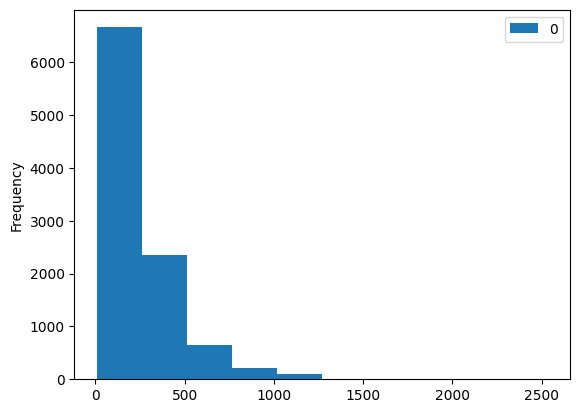

In [127]:
pd.DataFrame(size).plot(kind = 'hist')

In [131]:
max(size)

2535

In [129]:
max_features = 50000
tokenizer = Tokenizer(num_words = max_features, )
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = pad_sequences(X, padding = 'post' )
Y = pd.get_dummies(y).values

vocab_size = len(tokenizer.word_index)+1


In [130]:
X.shape

(10000, 2317)

In [132]:
train_X, test_X, train_y, test_y = train_test_split(X,Y, test_size=0.33, random_state=23)

In [133]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((6700, 2317), (3300, 2317), (6700, 2), (3300, 2))

In [134]:
X_train = np.array(train_X).reshape((train_X.shape[0], train_X.shape[1], 1))
X_test = np.array(test_X).reshape((test_X.shape[0], test_X.shape[1], 1))

In [135]:
X_train.shape

(6700, 2317, 1)

In [136]:
train_y.shape

(6700, 2)

In [137]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation
from keras import optimizers

In [140]:
def deep_lstm():
    model = Sequential()
    model.add(LSTM(20, input_shape = (2317,1), return_sequences = True))
    model.add(LSTM(20, return_sequences = True))
    model.add(LSTM(20, return_sequences = True))
    model.add(LSTM(20, return_sequences = False))
    model.add(Dense(2))
    model.add(Activation('softmax'))

    adam = optimizers.Adam()
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model

In [141]:
model = deep_lstm()
model.fit(X_train, train_y, epochs = 1, batch_size = 50, verbose = 1)

134/134 [==============================] - 309s 2s/step - loss: 0.6933 - accuracy: 0.5042


In [142]:
y_pred = model.predict(X_test)
y_test_ = np.argmax(y_pred, axis = 1)

104/104 [==============================] - 38s 351ms/step


In [143]:

print(accuracy_score(np.argmax(test_y, axis = 1), y_test_))

0.49424242424242426


In [66]:
from keras.layers import Bidirectional

In [67]:
def bidirectional_lstm():
    model = Sequential()
    model.add(Bidirectional(LSTM(20, return_sequences = False), input_shape = (400,1)))
    model.add(Dense(2))
    model.add(Activation('softmax'))

    adam = optimizers.Adam()
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model

In [68]:
model = bidirectional_lstm()
model.fit(X_train, train_y, epochs = 1, batch_size = 3, verbose = 1)

670/670 [==============================] - 46s 65ms/step - loss: 0.7022 - accuracy: 0.4935


In [69]:
y_pred = model.predict(X_test)
y_test_ = np.argmax(y_pred, axis = 1)

31/31 [==============================] - 2s 34ms/step


In [70]:
print(accuracy_score(np.argmax(test_y, axis = 1), y_test_))

0.4727272727272727


In [71]:
def deep_bidirectional_lstm():
    model = Sequential()
    model.add(Bidirectional(LSTM(10, return_sequences = True), input_shape = (400,1)))
    model.add(Bidirectional(LSTM(10, return_sequences = True)))
    model.add(Bidirectional(LSTM(10, return_sequences = True)))
    model.add(Bidirectional(LSTM(10, return_sequences = False)))
    model.add(Dense(2))
    model.add(Activation('softmax'))

    adam = optimizers.Adam()
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model

In [73]:
model = deep_bidirectional_lstm()
model.fit(X_train, train_y, epochs = 1, batch_size = 3, verbose = 1)

KeyboardInterrupt: 

In [ ]:




y_pred = model.predict(X_test)
y_test_ = np.argmax(y_pred, axis = 1)

In [ ]:
print(accuracy_score(np.argmax(test_y, axis = 1), y_test_))